IV.2 Travaux pratiques
Cahier Jupyter

L’objectif de cette séance de travaux pratiques est de montrer l’utilisation des méthodes d’agrégation (bagging, forêts aléatoires, boosting) pour les problèmes de classification et de régression, en python avec Sciki-learn. Ce document reprend librement certains exemples présentés dans la documentation de Scikit-learn.

Méthodes d’agrégation
Les méthodes ensemblistes (ou d’agrégation) pour les algorithmes d’apprentissage statistique (en anglais : ensemble learning) sont basées sur l’idée de combiner les prédictions de plusieurs prédicteurs (ou classifieurs) pour une meilleure généralisation et pour compenser les défauts éventuels de prédicteurs individuels.

En général, on distingue deux familles de méthodes de ce type :

Méthodes par moyennage (bagging, forêts aléatoires) où le principe est de faire la moyenne de plusieurs prédictions en espérant un meilleur résultat suite à la réduction de variance de l’éstimateur moyenne.

Méthodes adaptatives (boosting) où les paramètres sont itérativement adaptés pour produire un meilleur mélange.

Dans la suite nous explorerons chacune de ces classes d’algorithme en Scikit-learn et présenterons quelques comparaisons.

Bagging
Les méthodes de type bagging construisent plusieurs instances d’un estimateur, calculées sur des échantillons aléatoires tirés de la base d’apprentissage (et éventuellement une partie des attributs, également sélectionnés de façon aléatoire), et ensuite combine les prédictions individuelles en réalisant leur moyenne pour réduire la variance de l’estimateur. Leur avantage principal réside dans le fait qu’ils construisent une version améliorée de l’algorithme de base, sans demander de modification de cet algorithme. Le prix à payer est un coût de calcul plus élevé. Comme elles réduisent le sur-apprentissage, les méthodes bagging fonctionnent très bien avec des prédicteurs « forts ». Par contraste, les méthodes boosting sont mieux adaptées à des prédicteurs faibles (weak learners).

Dans Scikit-learn, les méthodes de bagging sont implémentées via la classe BaggingClassifier et BaggingRegressor. Les constructeurs prennent en paramètres un estimateur de base et la stratégie de sélection des points et attributs :

base_estimator : optionnel (default=None). Si None alors l’estimateur est un arbre de décision.

max_samples : la taille de l’échantillon aléatoire tiré de la base d’apprentissage.

max_features : le nombre d’attributs tirés aléatoirement.

bootstrap : boolean, optionnel (default=True). Tirage des points avec remise ou non.

bootstrap_features : boolean, optionnel (default=False). Tirage des attributs avec remise ou non.

oob_score : boolean. Estimer ou non l’erreur de généralisation OOB (Out of Bag).

Le code suivant construit un ensemble des classifieurs. Chaque classifieur de base est un KNeighborsClassifier (c’est-à-dire k-plus-proches-voisins), chacun utilisant au maximum 50% des points pour son apprentissage et la moitié des attributs (features) :

In [3]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

Dans cet exemple nous allons utiliser la base de données digits, qui contient 10 classes (images des chiffres en écriture manuscrite). Il y a 1797 éléments, chaque élément a 64 attributs (8 pixels par 8).

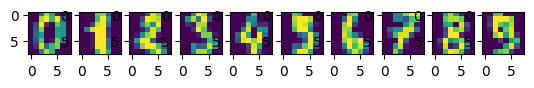

In [5]:
from sklearn.datasets import load_digits
digits = load_digits()

# Affichage des 10 premières images
import matplotlib.pyplot as plt
fig = plt.figure()
for i, digit in enumerate(digits.images[:10]):
    fig.add_subplot(1,10,i+1)
    plt.imshow(digit)
plt.show()

Pour ce TP, nous allons utiliser comme classifieur de base un arbre de décision DecisionTreeClassifier. Ce classifieur nous permet d’établir des performances de référence (c’est un ensemble à 1 modèle).

In [6]:
import numpy as np
from sklearn import tree
from sklearn.ensemble import BaggingClassifier

X, y = digits.data, digits.target
clf = tree.DecisionTreeClassifier()
clf.fit(X, y)
accuracy = clf.score(X,y)
print(accuracy)

1.0


Sur la base d’apprentissage accuracy = 1 . Pour plus de réalisme, découpons la base de données en un jeu d’apprentissage et un je de test afin de voir le comportement de généralisation de l’arbre sur des données différentes des celles d’apprentissage :Sur la base d’apprentissage accuracy = 1 . Pour plus de réalisme, découpons la base de données en un jeu d’apprentissage et un je de test afin de voir le comportement de généralisation de l’arbre sur des données différentes des celles d’apprentissage :

In [7]:
from sklearn.model_selection import train_test_split
# 90% des données pour le test, 10% pour l'apprentissage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

Z = clf.predict(X_test)
accuracy = clf.score(X_test,y_test)
print(accuracy)

0.703955500618047


Question :

Construire la variance de la valeur accuracy sur 100 tirages pour la séparation apprentissage/test. Que pouvons-nous conclure ?

In [8]:
# Correction :

N = 100
accuracies = []
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    Z = clf.predict(X_test)
    accuracies.append(clf.score(X_test,y_test))
    print(accuracies[i])

print(np.mean(accuracies), np.std(accuracies))

0.9
0.8444444444444444
0.9
0.8111111111111111
0.8444444444444444
0.8666666666666667
0.8222222222222222
0.8333333333333334
0.8666666666666667
0.8555555555555555
0.8888888888888888
0.8555555555555555
0.8777777777777778
0.7888888888888889
0.8777777777777778
0.8444444444444444
0.8444444444444444
0.8888888888888888
0.8444444444444444
0.8666666666666667
0.9
0.8666666666666667
0.8777777777777778
0.8555555555555555
0.7888888888888889
0.8666666666666667
0.8888888888888888
0.8777777777777778
0.8777777777777778
0.8555555555555555
0.9111111111111111
0.8444444444444444
0.8444444444444444
0.8222222222222222
0.8777777777777778
0.9111111111111111
0.8888888888888888
0.9
0.8666666666666667
0.8
0.8222222222222222
0.8222222222222222
0.8444444444444444
0.8666666666666667
0.8222222222222222
0.8333333333333334
0.8555555555555555
0.8444444444444444
0.8666666666666667
0.8555555555555555
0.8777777777777778
0.8222222222222222
0.8555555555555555
0.8777777777777778
0.9222222222222223
0.9
0.8666666666666667
0.82222

Si on exécute le code plusieurs fois on obtient des valeurs autour de mean=0.85 et stdev=sigma=0.04 (attention, vos valeurs seront légèrement différentes à cause du tirage aléatoire). Si on considère une distribution normale, les valeurs de accuracy vont se retrouver avec une probabilité de 99.7% dans une fourchette de ±3σ autour de la moyenne, ce qui donne une intervalle de variation de 6σ=0.24=24%. Les arbres de décision produisent donc des classifieurs avec un taux d’erreur qui n’est pas très stable, selon l’échantillon d’apprentissage.

Pour comparer, construisons mainntenant un classifieur bagging sur nos données, toujours basé sur les DecisionTreeClassifier :

In [9]:
clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=200)


L’apprentissage et l’évaluation de cet ensemble se font de la façon habituelle :



In [10]:
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
accuracy=clf.score(X_test,y_test)

Question :

Calculer la variance de la valeur accuracy sur 100 tirages pour la séparation apprentissage/test. Comparer avec la variance du classifieur de base. Que pouvons-nous conclure ?

Correction :

On obtient un meilleur classifieur (accuracy ~ 97%), qui en plus est beaucoup plus stable : stdev autour de 1%.

Question :

Construire le graphique accuracy vs n_estimators. Que constatez-vous ?

Correction :

Le taux d’erreur diminue avec n_estimators, mais à partir d’une valeur il se stabilise, donc on ne gagne rien à partir de cette valeur de n_estimators, si ce n’est que l’algorithme devient plus lent. Dans le code suivant nous avons pris test_size = 0.5 pour que l’effet soit plus visible.

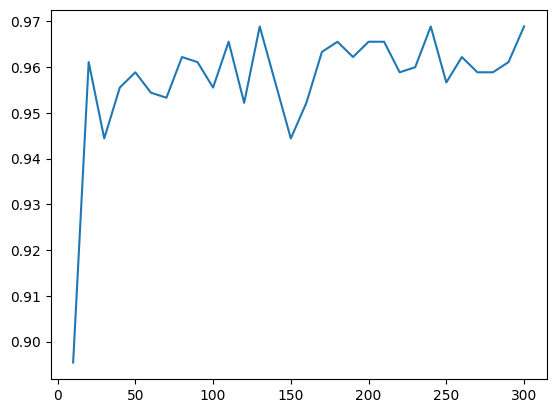

In [11]:
# Correction

N = 30
accuracy = []

for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=(i+1)*10)
    clf.fit(X_train, y_train)
    Z = clf.predict(X_test)
    accuracy.append(clf.score(X_test,y_test))

import matplotlib.pyplot as plt
plt.plot([10*(i+1) for i in range(N)], accuracy)
plt.show()

Question :

Faites varier les parametres max_samples et max_features. Pour quelles valeurs on obtient le meilleur résultat ? On pourra notamment utiliser GridSearchCV pour réaliser une recherche systématique.

Correction :

Pour chercher des bonnes valeurs pour les paramètres on utilise la validation croisée avec GridSearchCV, comme expliqué dans le TP sur l’évaluation et la sélection des modèles décisionnels <tpEvaluationSelectionModeles>_.

In [12]:
digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

from sklearn.model_selection import GridSearchCV
pgrid = {"max_samples": [0.2, 0.4, 0.6, 0.8],
        "max_features": [0.2, 0.4, 0.6, 0.8]}
grid_search = GridSearchCV(BaggingClassifier(tree.DecisionTreeClassifier()), param_grid=pgrid, cv=5)
grid_search.fit(X_train, y_train)
print("Meilleur score : " + str(grid_search.best_estimator_.score(X_test, y_test)))
print("max_samples: " + str(grid_search.best_estimator_.max_samples))
print("max_features: " + str(grid_search.best_estimator_.max_features))

Meilleur score : 0.9187986651835373
max_samples: 0.6
max_features: 0.6


Le programme affiche (vos résultats seront légèrement différents) un score de 93% obtenu pour max_samples = 0.8 et max_features = 0.6.

Forêts aléatoires
L’algorithme des forêts aléatoires propose une optimisation des arbres de décision. Il utilise le même principe que le bagging, mais avec une étape supplémentaire de randomisation dans la sélection des attributs des nœuds dans le but de réduire la variance de l’estimateur obtenu. Les deux objets Python qui implémentent les forêts aléatoires sont RandomForestClassifier et RandomForestRegressor. Les paramètres les plus importants sont :

n_estimators : integer, optional (default=10). Le nombre d’arbres.

max_features : le nombre d’attributs à considérer à chaque split.

max_samples : la taille de l’échantillon aléatoire tiré de la base d’apprentissage.

min_samples_leaf : le nombre minimal d’éléments dans un nœud feuille.

oob_score : boolean. Estimer ou non l’erreur de généralisation OOB (Out of Bag).

Par la suite nous allons refaire la classification sur la base Digits en utilisant un classifieur RandomForestClassifier. Comme d’habitude, on sépare les données en gardant 10% pour l’apprentissage et 90% pour le test.

In [13]:
digits = load_digits()
X, y = digits.data, digits.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

On peut désormais créer et entraîner notre modèle :

In [14]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

Puis réaliser les prédictions et calculer le score de test :

In [15]:
y_pred = clf.predict(X_test)
accuracy = clf.score(X_test,y_test)
print(accuracy)

0.9412855377008653


Question :

Comment la valeur de la variable accuracy se compare avec le cas bagging qui utilise le même nombre d’arbres (200 dans notre cas) ?

In [16]:
# Correction :

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print("Arbre de décision : " + str(clf.score(X_test,y_test)))

clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=200)
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print("Bagging (200 arbres) : " + str(clf.score(X_test,y_test)))

clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print("Forêt aléatoire (200 arbres) : " + str(clf.score(X_test,y_test)))

Arbre de décision : 0.6860321384425216
Bagging (200 arbres) : 0.92336217552534
Forêt aléatoire (200 arbres) : 0.9381953028430161


Le code précédent affiche (vos résultat seront un peu différents) :

`0.829810901001 0.959955506118 0.972191323693

Ce qui confirme notre attente : les forêts aléatoires produisent un classifieur un peu meilleur sur cette base de données.

Question :

Construire la variance de la valeur accuracy sur 100 tirages pour la séparation apprentissage/test. Que pouvons-nous conclure en comparant avec la séction précedente (bagging) ?

In [17]:
# Correction :

N = 10

bagging_accuracies = []
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    clf = BaggingClassifier(tree.DecisionTreeClassifier(), n_estimators=30)
    clf.fit(X_train, y_train)
    bagging_accuracies.append(clf.score(X_test,y_test))

print(np.mean(bagging_accuracies), np.std(bagging_accuracies))


rf_accuracies = []
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    clf = RandomForestClassifier(n_estimators=30)
    clf.fit(X_train, y_train)
    rf_accuracies.append(clf.score(X_test,y_test))

print(np.mean(rf_accuracies), np.std(rf_accuracies))

0.9375973303670744 0.011829119259260654
0.9549499443826474 0.007837903906541854


Le code affiche (vos résultat seront un peu différents) :

0.936484983315 0.0103328599427 0.957953281424 0.00600667408231

Nous avons donc non seulement un plus faible taux moyen d’erreurs, mais aussi une variance plus faible.

Question :

Construire le graphique accuracy vs n_estimators. Que constatez-vous ? A partir de quelle valeur on n’améliore plus ?

10 0.9254727474972191
20 0.9543937708565072
30 0.9655172413793104
40 0.9610678531701891
50 0.967741935483871
60 0.9655172413793104
70 0.9699666295884316
80 0.9655172413793104
90 0.9710789766407119
100 0.9699666295884316
110 0.9655172413793104
120 0.9733036707452726
130 0.967741935483871
140 0.9710789766407119
150 0.9699666295884316
160 0.9710789766407119
170 0.9710789766407119
180 0.9744160177975528
190 0.967741935483871
200 0.9766407119021134
210 0.9688542825361512
220 0.9766407119021134
230 0.9733036707452726
240 0.9688542825361512
250 0.9755283648498332
260 0.9744160177975528
270 0.9699666295884316
280 0.9688542825361512
290 0.9688542825361512
300 0.9710789766407119


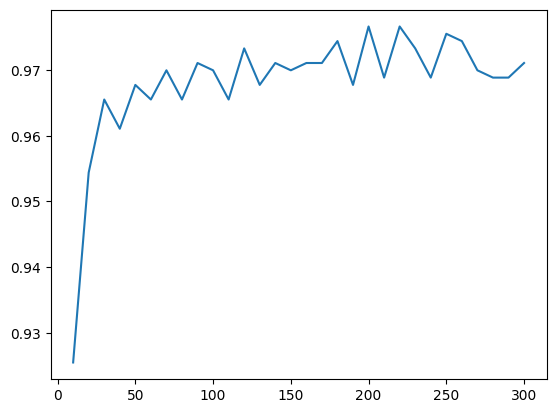

In [18]:
# orrection :

N = 30
accuracy = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

for i in range(N):
    clf = RandomForestClassifier(n_estimators=(i+1)*10)
    clf.fit(X_train, y_train)
    accuracy.append(clf.score(X_test,y_test))
    print((i+1)*10, accuracy[i])

plt.plot([10*(i+1) for i in range(30)], accuracy)
plt.show()

A partir de n_estimators = 50 le résultat commence à osciller autour de la moyenne donc on ne gagne plus rien en augmentant la valeur.

Question :

Regardez dans la documentation les ExtraTreesClassifier et refaites la classification avec ce type de classifieur. Comparez avec RandomForestClassifier.

Correction :

Les Extra-Trees (Extremely Randomized Trees) randomisent encore plus la construction de l’arbre et sont utilisés surtout pour des données numériques. Par rapport aux forêts aléatoires, ils abandonnent l’utilisation des échantillons de bootstrap et pour chaque feature candidat choisissent un seuil de coupure aléatoire. L’idée fonctionne plutôt bien pour de problèmes d’apprentissage qui ont un grand nombre de features qui varient de manière continue. Souvent leur taux d’erreur est supérieur aux forêts aléatoires, le temps de calcul plus faible et les arbres générés sont plus grands.

In [19]:
from sklearn.ensemble import ExtraTreesClassifier

import numpy as np
digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=0)

clf = RandomForestClassifier(n_estimators=50)
clf.fit(X_train, y_train)
accuracy=clf.score(X_test,y_test)
print("Forêt aléatoire : " + str(accuracy))

clf = ExtraTreesClassifier(n_estimators=50)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test,y_test)
print("Extra Trees : " + str(accuracy))

Forêt aléatoire : 0.9610678531701891
Extra Trees : 0.9710789766407119


Le bloc de code affiche : 0.967741935484 0.982202447164

Boosting
Le principe du boosting est d’évaluer une séquence de classifieurs faibles (weak learners) sur plusieurs versions légèrement modifiées des données d’apprentissage. Les décisions obtenues sont alors combinées par une somme ponderée pour obtenir le modèle final.

Avec scikit-learn, c’est la classe AdaBoostClassifier qui implémente cet algorithme. Les paramètres les plus importants sont :

n_estimators : integer, optional (default=10). Le nombre de classifieurs faibles.

learning_rate : contrôle la vitesse de changement des poids par itération.

base_estimator : (default=DecisionTreeClassifier) le classifieur faible utilisé.

Dans la suite nous allons refaire la classification sur la base Digits en utilisant un classifieur RandomForestClassifier :

In [20]:
from sklearn.ensemble import AdaBoostClassifier

digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

# AdaBoost basé sur 200 arbres de décision
clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=5), n_estimators=200, learning_rate=2)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

TypeError: AdaBoostClassifier.__init__() got an unexpected keyword argument 'base_estimator'

Question :

Le paramètre max_depth contrôle la profondeur de l’arbre. Essayez plusieurs valeurs pour voir l’impact de l’utilisation d’un classifieur faible vs plus fort (max_depth élevé ou éliminer le paramètre). Testez aussi l’effet du paramètre learning_rate et le nombre de classifieurs.

Correction :

max_depth féible génère des arbres peu profonds qui ont tendance à généraliser mal. max_dept élevé génère des arbres trop profonds (sur-apprentissage) d’où encore une mauvaise généralisation :

(max_dept, accuracy) : (2, 0.70), (3, 0.85), (4, 0.87), (5, 0.89), (10, 0.95), (15, 0.80)

Par contre, un mauvais classifieur faible (par exemple max_depth = 2) peut etre compensé par un parametre n_estimators plus grand : n_estimators = 30 donne accuracy = 0.85, n_estimators = 300 donne accuracy = 0.95.

Une valeur plus faible de learning_rate permet d’améliorer le score, mais pas au-delà d’une certaine valeur : learning_rate = 2 donne accuracy = 0.89, learning_rate = 0.1 donne accuracy = 0.93 mais learning_rate = 0.1 ne change plus le taux d’erreurs.